In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

In [110]:
import platform
system_name = platform.system()
print(system_name)
if system_name == "Windows":
    font_family = "Malgun Gothic"
plt.rc("font", family=font_family)

Windows


In [111]:
plt.rc("axes", unicode_minus=False)

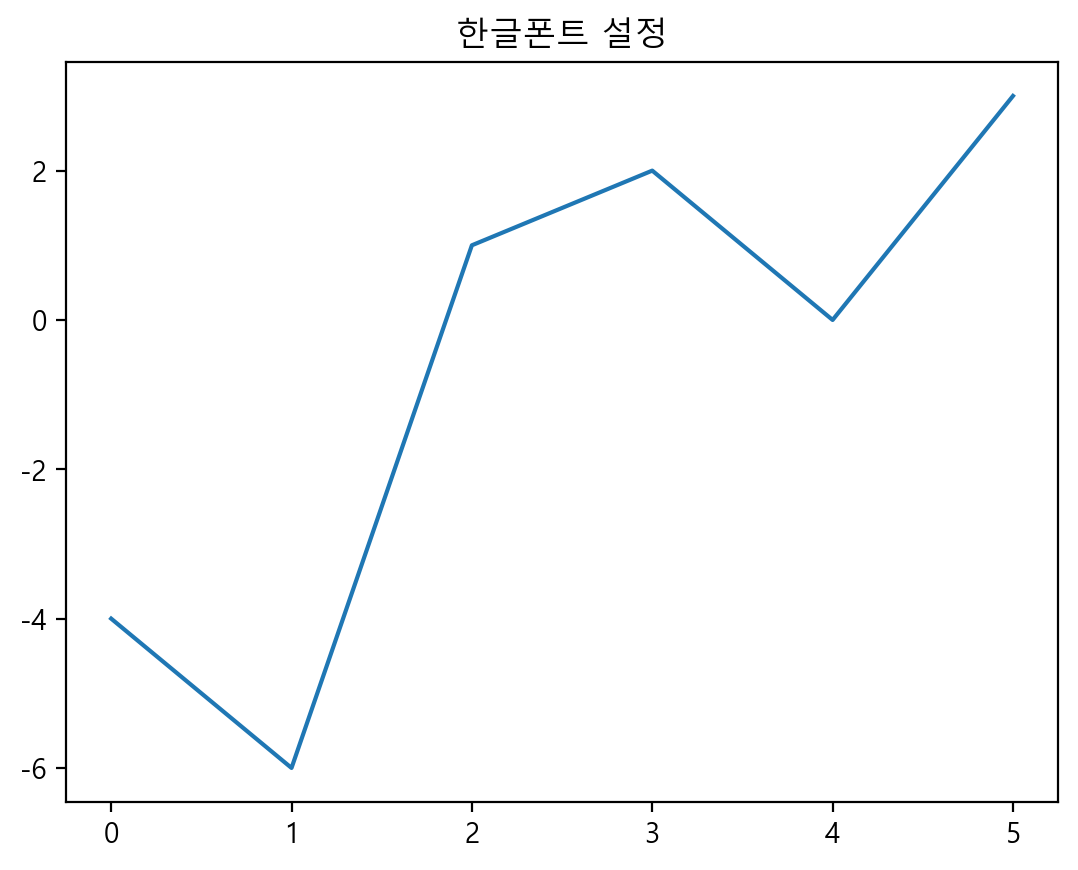

In [112]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트 설정")
plt.plot([-4, -6, 1, 2, 0, 3])

#### 데이터 불러오기

In [115]:
df = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_대구_202312.csv', encoding='utf-8')
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0090318,아보카,NaN,I2,음식,I203,일식,I20301,일식 회/초밥,I56122,...,2729011600110100000000001,NaN,대구광역시 달서구 수밭동길 34,704802,42835,NaN,1,NaN,128.549749,35.795445
1,MA010120220805430943,모텔탑,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,2714014200100370005004100,NaN,대구광역시 동구 파계로138길 40,701500,41001,NaN,NaN,NaN,128.639751,35.992577
2,MA010120220805432876,킴스헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,2723011400106790000009408,대구동서변그린빌,대구광역시 북구 동변로 55,702733,41414,NaN,1,NaN,128.602432,35.916799


In [118]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

#### 데이터 크기

In [119]:
df.shape

(113639, 39)

#### info보기

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113639 entries, 0 to 113638
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     113639 non-null  object 
 1   상호명        113639 non-null  object 
 2   지점명        1932 non-null    object 
 3   상권업종대분류코드  113639 non-null  object 
 4   상권업종대분류명   113639 non-null  object 
 5   상권업종중분류코드  113639 non-null  object 
 6   상권업종중분류명   113639 non-null  object 
 7   상권업종소분류코드  113639 non-null  object 
 8   상권업종소분류명   113639 non-null  object 
 9   표준산업분류코드   113622 non-null  object 
 10  표준산업분류명    113622 non-null  object 
 11  시도코드       113639 non-null  int64  
 12  시도명        113639 non-null  object 
 13  시군구코드      113639 non-null  int64  
 14  시군구명       113639 non-null  object 
 15  행정동코드      113639 non-null  int64  
 16  행정동명       113639 non-null  object 
 17  법정동코드      113639 non-null  int64  
 18  법정동명       113639 non-null  object 
 19  지번코드       113639 non-n

#### 결측치 보기

<Axes: >

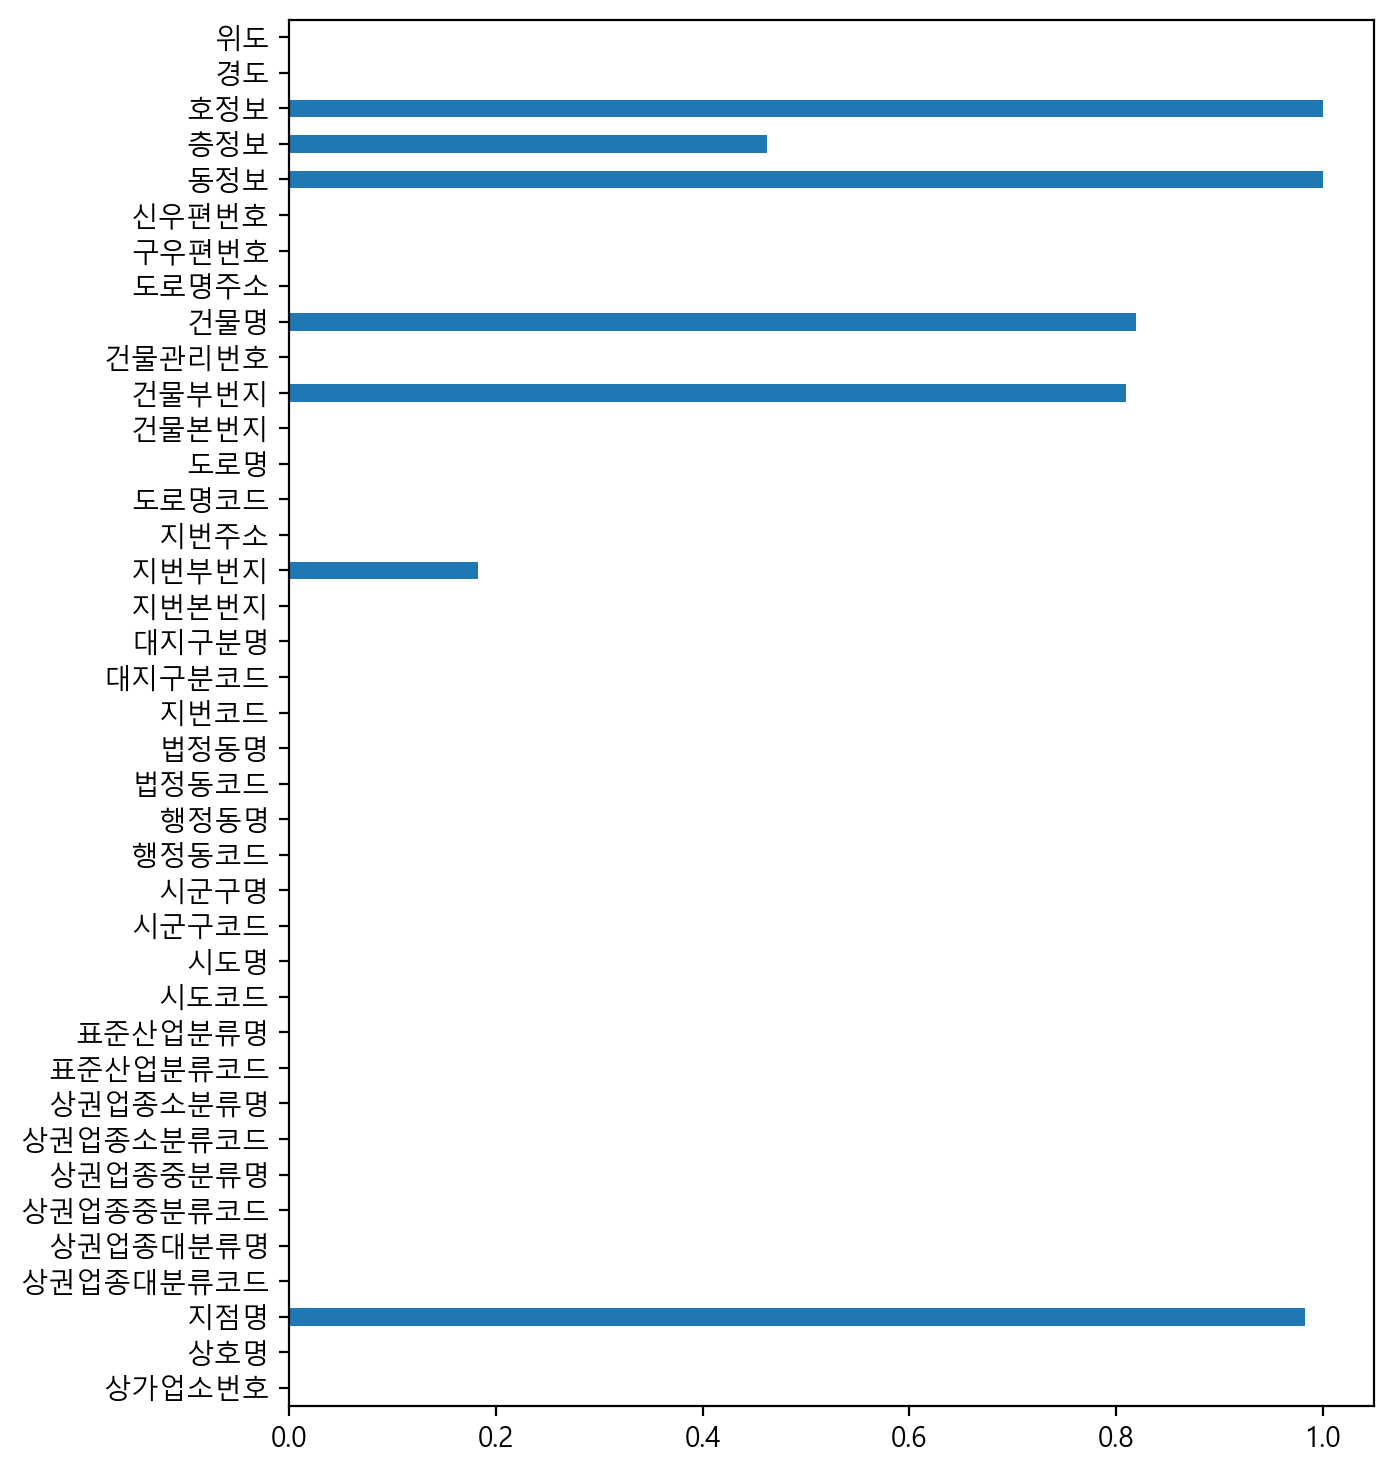

In [121]:
df.isnull().mean().plot.barh(figsize=(7, 9))

#### 사용하지 않는 컬럼 제거

In [122]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [123]:
# 사용하는 컬럼으로 지정도 가능
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', '경도', '위도']
print(df.shape)
df = df[columns].copy()
print(df.shape)

(113639, 39)
(113639, 11)


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113639 entries, 0 to 113638
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       113639 non-null  object 
 1   상권업종대분류명  113639 non-null  object 
 2   상권업종중분류명  113639 non-null  object 
 3   상권업종소분류명  113639 non-null  object 
 4   시도명       113639 non-null  object 
 5   시군구명      113639 non-null  object 
 6   행정동명      113639 non-null  object 
 7   법정동명      113639 non-null  object 
 8   도로명주소     113639 non-null  object 
 9   경도        113639 non-null  float64
 10  위도        113639 non-null  float64
dtypes: float64(2), object(9)
memory usage: 9.5+ MB


In [125]:
df['시군구명'].unique()

array(['달서구', '동구', '북구', '남구', '수성구', '서구', '달성군', '중구', '군위군'],
      dtype=object)

In [23]:
df_daegu = df.copy()

#### 상권업종대분류명 가운데 '음식' 항목 추출

In [126]:
df_food = df_daegu[df_daegu["상권업종대분류명"]=='음식'].copy()
print(f'(상권업종대분류명=음식)의 수 : {len(df_food)}')
df_food.head()

(상권업종대분류명=음식)의 수 : 38291


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,아보카,음식,일식,일식 회/초밥,일식 음식점업,대구광역시,달서구,도원동,도원동,대구광역시 달서구 수밭동길 34,128.549749,35.795445
3,카페사람이야기,음식,비알코올,카페,커피 전문점,대구광역시,동구,혁신동,각산동,대구광역시 동구 이노밸리로46길 4-9,128.721839,35.877366
4,다즐링,음식,비알코올,카페,커피 전문점,대구광역시,동구,신천4동,신천동,대구광역시 동구 화랑로 23,128.631047,35.868657
7,라팡,음식,기타 간이,빵/도넛,제과점업,대구광역시,수성구,고산2동,시지동,대구광역시 수성구 달구벌대로 3012,128.686798,35.841303
8,공원생막창&뒷고기,음식,한식,돼지고기 구이/찜,한식 육류 요리 전문점,대구광역시,달서구,월성1동,월성동,대구광역시 달서구 상원로 184-8,128.527333,35.823586


#### 상권업종대분류명 == 음식 인 항목가운데 중분류명 항목보기

In [36]:
df_food['상권업종중분류명'].unique()

array(['일식', '비알코올 ', '기타 간이', '한식', '구내식당·뷔페', '주점', '중식', '동남아시아',
       '서양식', '기타 외국'], dtype=object)

In [37]:
# 비알코올 공백 있음 
df_non_alcohol = df_food[df_food["상권업종중분류명"]=='비알코올 '].copy()
df_non_alcohol.shape

(5577, 12)

#### 상권업종중분류명 == '비알코올 '  항목보기

In [38]:
df_non_alcohol["상권업종소분류명"].unique()

array(['카페'], dtype=object)

In [39]:
df_non_alcohol.shape

(5577, 12)

#### 상권업종소분류명 == '카페'  항목보기 + 상권업종소분류명 == '독서실/스터디 카페'

In [55]:
df_cafe = df_non_alcohol[df_non_alcohol["상권업종소분류명"]=='카페'].copy()
df_cafe.shape

(5577, 12)

#### 파일로 저장

In [56]:
df_cafe.to_csv('daegu_cafe_info.csv', encoding='utf-8')

#### 커피 프랜차이즈 가운데 숫자가 많은 항목 5개 추출

In [127]:
df_cafe["상호명"].value_counts().head(30)

상호명
몬스터커피        37
카페봄봄         32
봄봄           30
청솔로9         25
공차대구         17
하삼동커피        16
마시그래이        15
더벤티          14
매스커피         14
레프트뱅크        14
투썸플레이스대구     14
더리터          13
핸즈커피         12
이디야커피대구      12
투썸플레이스       12
컴포즈커피        12
카페           11
스터디카페구겐하임    10
플랜           10
마실커피          9
파스쿠찌대구        9
컴포즈커피대구       8
몰타            8
메가엠지씨커피대구     8
커피명가          8
두잉스터디카페       8
빽다방대구         8
구공카페          8
읍천리382        7
캔버스           7
Name: count, dtype: int64

#### 키워드 추출
- 몬스터커피 37
- 봄봄(카페봄봄) 64
- 청솔로9 25
- 공차(공차대구) 17
- 빽다방(빽다방대구)
- 하삼동(하삼동커피)
- 투썸플레이스
- 마시그래이
- 레프트뱅크
- 더밴티
- 컴포즈        12
- 이디야커피      12
- 핸즈커피         12
- 텐퍼센트        7
- 팔공티

#### 커피 프랜차이즈 정보 추출

In [69]:
cafe_name = ['몬스터커피','봄봄','청솔로9','공차','빽다방','하삼동',
             '투썸플레이스','마시그래이','레프트뱅크',
             '컴포즈','이디야','핸즈커피','텐퍼센트','팔공티']
cafe_name_fix = ['몬스터커피','카페봄봄','청솔로9커피','공차','빽다방','하삼동커피',
             '투썸플레이스','마시그래이커피','레프트뱅크',
             '컴포즈커피','이디야커피','핸즈커피','텐퍼센트커피','팔공티']

for i,name in enumerate(cafe_name):
    df_cafe.loc[df_cafe['상호명'].str.contains(name), '브랜드명'] = cafe_name_fix[i]
df_cafe.head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
3,카페사람이야기,음식,비알코올,카페,커피 전문점,대구광역시,동구,혁신동,각산동,대구광역시 동구 이노밸리로46길 4-9,128.721839,35.877366,NaN
4,다즐링,음식,비알코올,카페,커피 전문점,대구광역시,동구,신천4동,신천동,대구광역시 동구 화랑로 23,128.631047,35.868657,NaN
22,아더와이즈,음식,비알코올,카페,커피 전문점,대구광역시,달서구,두류3동,두류동,대구광역시 달서구 당산로38길 13,128.549264,35.853493,NaN


In [70]:
df_cafe['브랜드명'].value_counts()

브랜드명
카페봄봄       136
이디야커피       98
투썸플레이스      86
몬스터커피       65
빽다방         63
공차          48
청솔로9커피      45
컴포즈커피       44
마시그래이커피     39
하삼동커피       35
핸즈커피        34
텐퍼센트커피      33
레프트뱅크       24
팔공티         15
더밴티커피        1
Name: count, dtype: int64

In [129]:
name = '팔공티'
df_cafe['상호명'].str.contains(name).value_counts()

상호명
False    6079
True       15
Name: count, dtype: int64

In [130]:
df_cafe = df[df["상권업종소분류명"].isin(['카페','독서실/스터디 카페'])].copy()
cafe_name = ['몬스터커피','봄봄','청솔로9','공차','빽다방','하삼동',
             '투썸플레이스','마시그래이','레프트뱅크',
             '컴포즈','이디야','핸즈커피','텐퍼센트','팔공티']
cafe_name_fix = ['몬스터커피','카페봄봄','청솔로9커피','공차','빽다방','하삼동커피',
             '투썸플레이스','마시그래이커피','레프트뱅크',
             '컴포즈커피','이디야커피','핸즈커피','텐퍼센트커피','팔공티']

for i,name in enumerate(cafe_name):
    df_cafe.loc[df_cafe['상호명'].str.contains(name), '브랜드명'] = cafe_name_fix[i]
df_cafe['브랜드명'].value_counts()

브랜드명
카페봄봄       136
이디야커피       98
투썸플레이스      86
몬스터커피       65
빽다방         63
공차          48
청솔로9커피      45
컴포즈커피       44
마시그래이커피     39
하삼동커피       35
핸즈커피        34
텐퍼센트커피      33
레프트뱅크       24
팔공티         15
Name: count, dtype: int64

In [134]:
name = '봄봄|카페봄봄'
df_cafe['상호명'].str.contains(name).value_counts()

상호명
False    5958
True      136
Name: count, dtype: int64

In [133]:
df_cafe = df[df["상권업종소분류명"].isin(['카페','독서실/스터디 카페'])].copy()
cafe_name = ['몬스터커피','봄봄|카페봄봄','청솔로9','공차','빽다방','하삼동',
             '투썸플레이스','마시그래이','레프트뱅크',
             '컴포즈','이디야','핸즈커피','텐퍼센트','팔공티']
cafe_name_fix = ['몬스터커피','카페봄봄','청솔로9커피','공차','빽다방','하삼동커피',
             '투썸플레이스','마시그래이커피','레프트뱅크',
             '컴포즈커피','이디야커피','핸즈커피','텐퍼센트커피','팔공티']

for i,name in enumerate(cafe_name):
    df_cafe.loc[df_cafe['상호명'].str.contains(name), '브랜드명'] = cafe_name_fix[i]
df_cafe['브랜드명'].value_counts()

브랜드명
카페봄봄       136
이디야커피       98
투썸플레이스      86
몬스터커피       65
빽다방         63
공차          48
청솔로9커피      45
컴포즈커피       44
마시그래이커피     39
하삼동커피       35
핸즈커피        34
텐퍼센트커피      33
레프트뱅크       24
팔공티         15
Name: count, dtype: int64

#### 지점수 많은 5개 항목만 추출

In [100]:
search_key = '봄봄|이디야|투썸플레이스|몬스터커피|빽다방'
df_coffee = df_cafe.loc[df_cafe['상호명'].str.contains(search_key)].copy()

#### 지점수 순으로 정렬

In [131]:
for i in df_coffee.index:
    df_coffee.loc[i,'브랜드지점수'] = df_coffee['브랜드명'].value_counts()[df_coffee.loc[i,'브랜드명']]
# 지점수 많은 순으로 정렬
df_coffee_sorted = df_coffee.sort_values(by='브랜드지점수', axis=0, ascending=False)
df_coffee_sorted.head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명,브랜드지점수
27249,카페봄봄산격점,음식,비알코올,카페,커피 전문점,대구광역시,북구,산격2동,산격동,대구광역시 북구 동북로 163,128.612003,35.899202,카페봄봄,136.0
85172,카페봄봄,음식,비알코올,카페,커피 전문점,대구광역시,중구,성내1동,동성로2가,대구광역시 중구 중앙대로 412-21,128.595013,35.869995,카페봄봄,136.0
45833,카페봄봄학정점,음식,비알코올,카페,커피 전문점,대구광역시,북구,국우동,학정동,대구광역시 북구 학정로 533,128.565023,35.952304,카페봄봄,136.0


#### 각 구별 브랜드 수 구하기

In [132]:
table_brand = df_coffee_sorted.pivot_table(index="시군구명",columns='브랜드명',
                                values="상호명", aggfunc="count", fill_value=0)
table_brand

브랜드명,몬스터커피,빽다방,이디야커피,카페봄봄,투썸플레이스
시군구명,,,,,
군위군,0,0,1,1,1
남구,3,0,5,11,3
달서구,12,15,21,29,17
달성군,6,4,13,13,10
동구,5,10,8,15,12
북구,13,13,15,21,12
서구,6,3,2,6,2
수성구,11,8,20,27,17
중구,9,10,13,13,12


#### 구별 브랜드 수 bar그래프로 표시

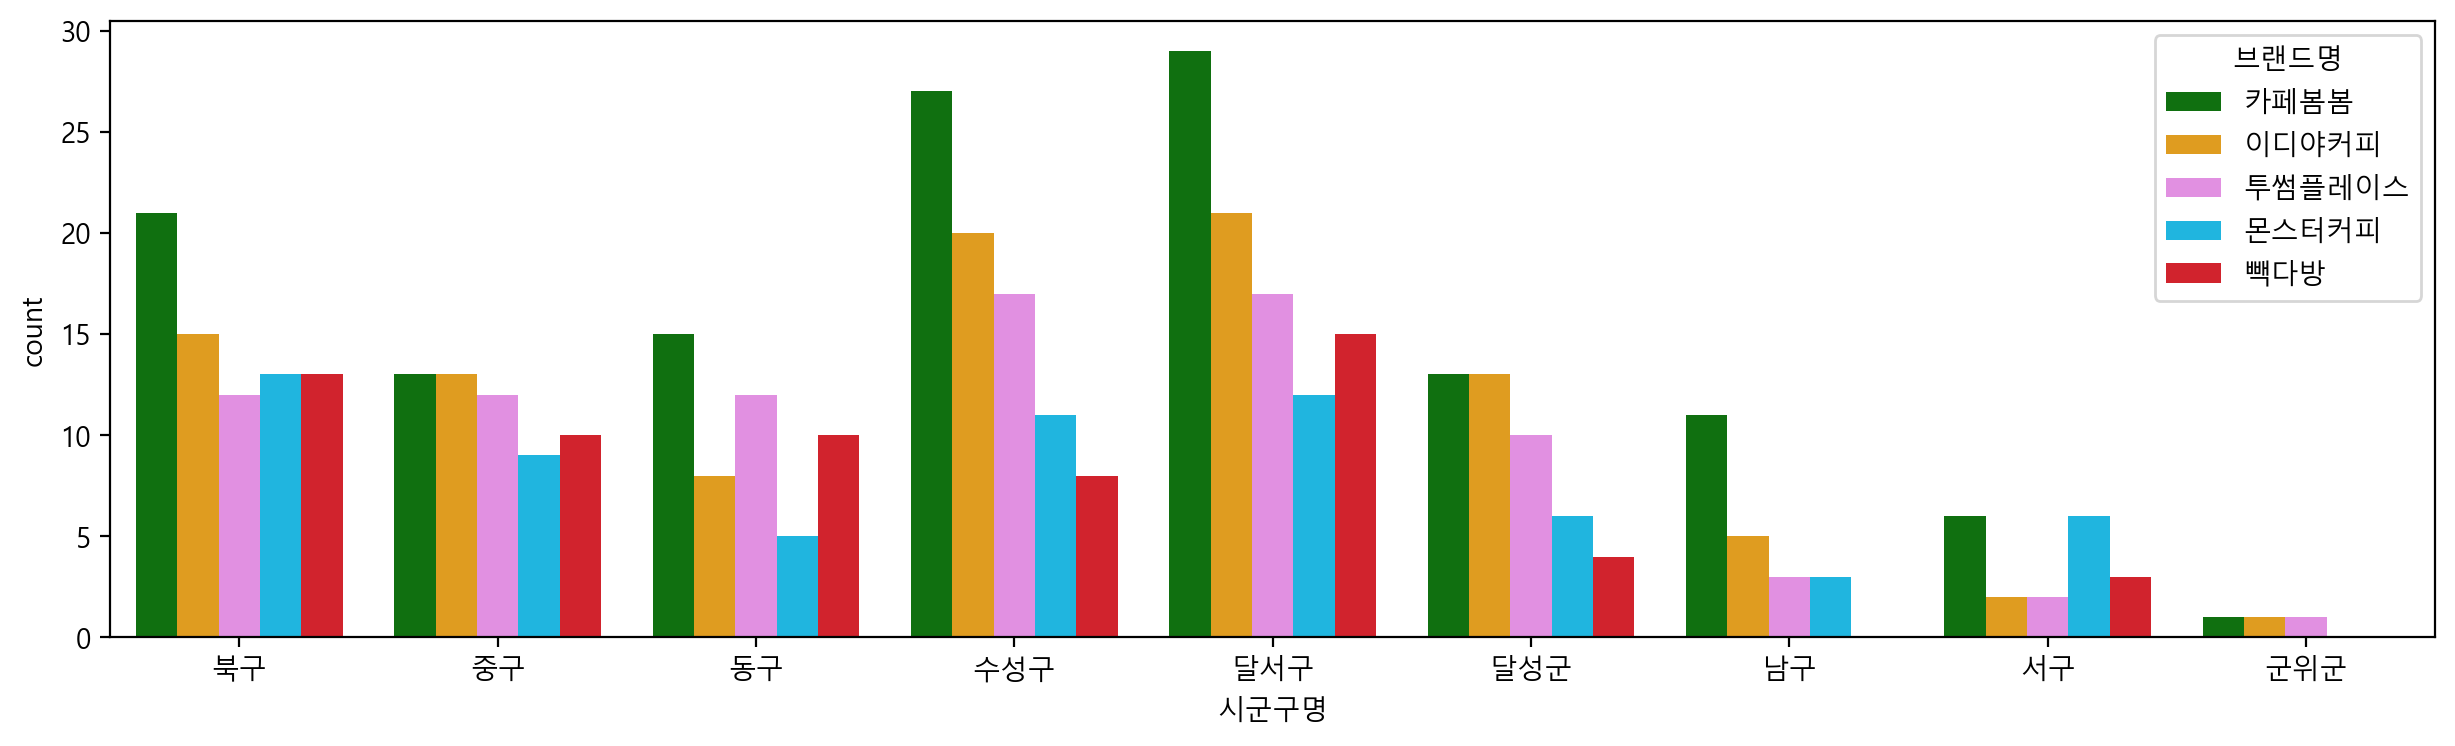

In [103]:
color_dict = {'몬스터커피':'#00C7FF',  '빽다방':'#EE0613', '이디야커피':'orange', '카페봄봄':'green', '투썸플레이스':'violet'}
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_coffee_sorted, x="시군구명", hue='브랜드명', palette=color_dict)

#### 지도에 다른 색깔로 지점위치 표시(브랜드명-도로명주소 라벨)

In [104]:
!pip install folium

In [108]:
import folium

lat = df_coffee_sorted['위도'].mean()
long = df_coffee_sorted['경도'].mean()

m = folium.Map(location=[lat,long], zoom_start=12, height=800)

for i in df_coffee.index:
    row = df_coffee.loc[i]
    i_lat = row['위도']
    i_long = row['경도']
    label = row['브랜드명']+' - '+row['도로명주소'][6:] # 도로명 주소앞 '대구광역시 ' 생략
    color = color_dict[row['브랜드명']]
    popup = folium.Popup(label, max_width=150)
    folium.CircleMarker(
        location = [i_lat, i_long],
        radius = 3,
        color = color,
        fill = False,
        fill_opacity = 1, 
        fill_color = color,
        popup = popup
    ).add_to(m)
m